<a href="https://colab.research.google.com/github/tuananh1006/Torch_Practice/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
num_points=360*4

In [ ]:
X=np.arange(num_points)
y = [np.cos(X[i]*np.pi/180) * (1+i/num_points) + (np.random.randn(1)*0.1)[0] for i in range(len(X))]


<Axes: >

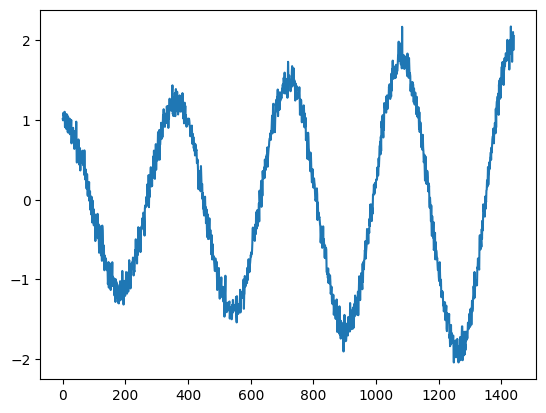

In [ ]:
import seaborn as sns
sns.lineplot(x=X, y=y)


In [ ]:
X_restruct = []
y_restruct = []

In [ ]:
for i in range(num_points-10):
     list1 = []
     for j in range(i,i+10):
         list1.append(y[j])
     X_restruct.append(list1)
     y_restruct.append(y[j+1])
X_restruct = np.array(X_restruct)
y_restruct = np.array(y_restruct)
# %% Train / Test Split
train_test_clipping = 360*3
X_train = X_restruct[:train_test_clipping]
X_test = X_restruct[train_test_clipping:]
y_train = y_restruct[:train_test_clipping]
y_test = y_restruct[train_test_clipping:]


In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
import torch
class TimeSeriesSet(Dataset):
  def __init__(self,X,y):
    super().__init__()
    self.X=torch.Tensor(X)
    self.y=torch.Tensor(y)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

In [ ]:
train_loader=DataLoader(TimeSeriesSet(X_train,y_train),batch_size=16,shuffle=True)
test_loader=DataLoader(TimeSeriesSet(X_test,y_test),batch_size=16,shuffle=True)

<Axes: >

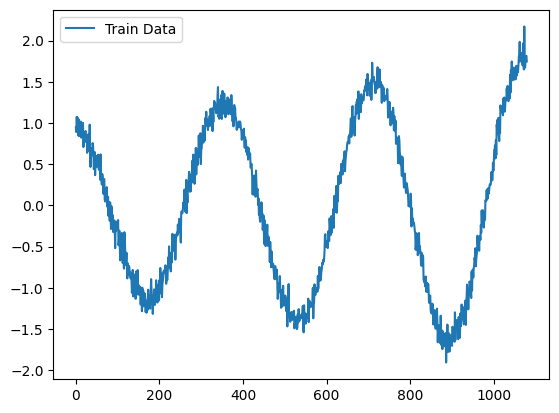

In [ ]:
sns.lineplot(x=range(len(y_train)), y=y_train, label = 'Train Data')


In [ ]:
# %% Model
class TrigonometryModel(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(TrigonometryModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size=5, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(in_features=5, out_features=output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x, status = self.lstm(x)
        x = x[:, -1, :]  # reshape for fc layer; out: BS, hidden
        x = self.fc1(x)
        x = self.relu(x)

        return x

In [ ]:
#%% instantiate model, optimizer, and loss
model = TrigonometryModel()
# input = torch.rand((2, 10, 1))  # BS, seq_len, input_size
# model(input).shape  # out: [BS, seq_len, hidden]


#%% Loss and Optimizer
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
NUM_EPOCHS = 20

#%% Train
for epoch in range(NUM_EPOCHS):
    for j, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X.view(-1, 10, 1))
        loss = loss_fun(y_pred, y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        print(f"Epoch: {epoch}, Loss: {loss.data}")

Epoch: 0, Loss: 1.1309764385223389
Epoch: 0, Loss: 1.362141489982605
Epoch: 0, Loss: 0.6955971121788025
Epoch: 0, Loss: 1.0655702352523804
Epoch: 0, Loss: 1.017586350440979
Epoch: 0, Loss: 1.1567102670669556
Epoch: 0, Loss: 0.895664632320404
Epoch: 0, Loss: 0.9021491408348083
Epoch: 0, Loss: 0.9842912554740906
Epoch: 0, Loss: 1.103294849395752
Epoch: 0, Loss: 1.0803546905517578
Epoch: 0, Loss: 1.0320398807525635
Epoch: 0, Loss: 0.6175612211227417
Epoch: 0, Loss: 0.9452167749404907
Epoch: 0, Loss: 1.0724514722824097
Epoch: 0, Loss: 1.2333323955535889
Epoch: 0, Loss: 0.807154655456543
Epoch: 0, Loss: 1.6280522346496582
Epoch: 0, Loss: 1.6713389158248901
Epoch: 0, Loss: 0.9026284217834473
Epoch: 0, Loss: 1.338850498199463
Epoch: 0, Loss: 1.1570619344711304
Epoch: 0, Loss: 0.704461932182312
Epoch: 0, Loss: 1.3416080474853516
Epoch: 0, Loss: 0.6689529418945312
Epoch: 0, Loss: 1.2870374917984009
Epoch: 0, Loss: 0.9959410429000854
Epoch: 0, Loss: 1.165780782699585
Epoch: 0, Loss: 0.9660931825

<Axes: >

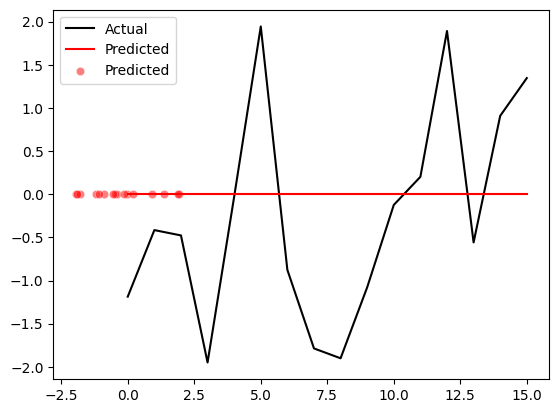

In [ ]:
# %% Create Predictions
test_set = TimeSeriesSet(X_test, y_test)
X_test_torch, y_test_torch = next(iter(test_loader))
with torch.no_grad():
    y_pred = model(torch.unsqueeze(X_test_torch, 2)).detach().squeeze().numpy()
y_act = y_test_torch.numpy()
x_act = range(y_act.shape[0])
sns.lineplot(x=x_act, y=y_act, label = 'Actual',color='black')
sns.lineplot(x=x_act, y=y_pred, label = 'Predicted',color='red')

# %% correlation plot
sns.scatterplot(x=y_act, y=y_pred, label = 'Predicted',color='red', alpha=0.5)
# %%

<Axes: >

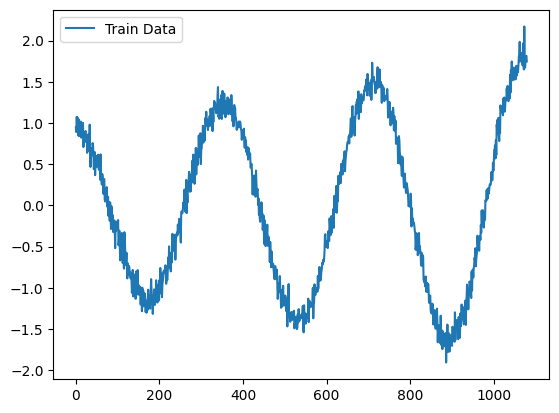

In [ ]:
# Dataloader
train_loader = DataLoader(TimeSeriesSet(X_train, y_train), batch_size=2)
test_loader = DataLoader(TimeSeriesSet(X_test, y_test), batch_size=len(y_test))
#%% visualize train data
sns.lineplot(x=range(len(y_train)), y=y_train, label = 'Train Data')


In [ ]:
class TrigonometryModel(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(TrigonometryModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size=5, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(in_features=5, out_features=output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x, status = self.lstm(x)
        x = x[:, -1, :]  # reshape for fc layer; out: BS, hidden
        x = self.fc1(x)
        # x = self.relu(x)

        return x

In [ ]:
#%% instantiate model, optimizer, and loss
model = TrigonometryModel()
# input = torch.rand((2, 10, 1))  # BS, seq_len, input_size
# model(input).shape  # out: [BS, seq_len, hidden]


#%% Loss and Optimizer
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
NUM_EPOCHS = 40

#%% Train
for epoch in range(NUM_EPOCHS):
    for j, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X.view(-1, 10, 1))
        loss = loss_fun(y_pred, y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        print(f"Epoch: {epoch}, Loss: {loss.data}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 30, Loss: 0.009927201084792614
Epoch: 30, Loss: 0.044502656906843185
Epoch: 30, Loss: 0.009410250931978226
Epoch: 30, Loss: 0.005711073521524668
Epoch: 30, Loss: 0.006358002312481403
Epoch: 30, Loss: 0.010960560292005539
Epoch: 30, Loss: 0.0494702085852623
Epoch: 30, Loss: 0.012518718838691711
Epoch: 30, Loss: 0.02249409817159176
Epoch: 30, Loss: 0.03923230618238449
Epoch: 30, Loss: 0.016858726739883423
Epoch: 30, Loss: 0.011574150063097477
Epoch: 30, Loss: 0.012311568483710289
Epoch: 30, Loss: 0.030693141743540764
Epoch: 30, Loss: 0.028027256950736046
Epoch: 30, Loss: 0.0016652976628392935
Epoch: 30, Loss: 0.08695949614048004
Epoch: 30, Loss: 0.037045881152153015
Epoch: 30, Loss: 0.02603762038052082
Epoch: 30, Loss: 0.03536388650536537
Epoch: 30, Loss: 0.011507201939821243
Epoch: 30, Loss: 0.004607029724866152
Epoch: 30, Loss: 0.024082357063889503
Epoch: 30, Loss: 0.012218432500958443
Epoch: 30, Loss: 0.02446349710226059


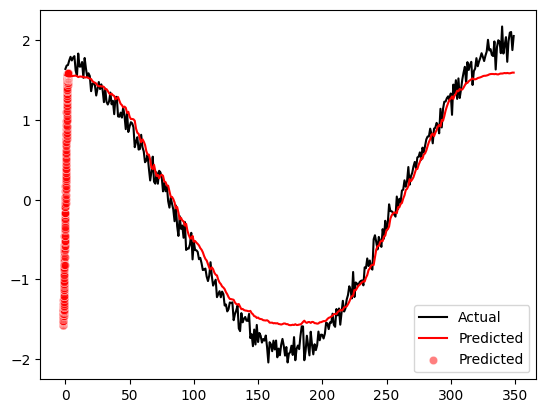

In [ ]:
# %% Create Predictions
test_set = TimeSeriesSet(X_test, y_test)
X_test_torch, y_test_torch = next(iter(test_loader))
with torch.no_grad():
    y_pred = model(torch.unsqueeze(X_test_torch, 2)).detach().squeeze().numpy()
y_act = y_test_torch.numpy()
x_act = range(y_act.shape[0])
sns.lineplot(x=x_act, y=y_act, label = 'Actual',color='black')
sns.lineplot(x=x_act, y=y_pred, label = 'Predicted',color='red')

# %% correlation plot
sns.scatterplot(x=y_act, y=y_pred, label = 'Predicted',color='red', alpha=0.5)
# %% predict future timeseries
# solution by Fabian Stohr
num_future_steps = 3

# Initialize a new input tensor with additional future steps
X_extrapolate = torch.cat((X_test_torch.unsqueeze(2), torch.zeros(X_test_torch.shape[0], num_future_steps, 1)), dim=1)


<Axes: >

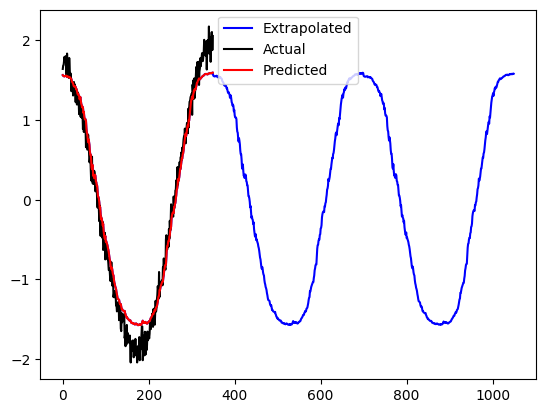

In [ ]:
with torch.no_grad():
    for i in range(X_test_torch.shape[1], X_test_torch.shape[1] + num_future_steps):
        # Prediction des nächsten Wertes
        next_pred = model(X_extrapolate[:, :i, :])

        # Update des Input Tensors mit dem letzten vorhergesagten Wert
        X_extrapolate[:, i, :] = next_pred.view(-1, 1)

    # Squeeze und numpy umwandeln, für die Visualisierung
    y_pred_extrapolated = X_extrapolate[:, -num_future_steps:, :].squeeze(2).cpu().numpy()

# visualize extrapolation
sns.lineplot(x= np.linspace(0, len(y_pred_extrapolated.flatten('F'))-1, num=len(y_pred_extrapolated.flatten('F'))), y=y_pred_extrapolated.flatten('F'), label='Extrapolated', color='blue')

sns.lineplot(x=x_act, y=y_act, label = 'Actual',color='black')

sns.lineplot(x=x_act, y=y_pred, label = 'Predicted',color='red')